In [1]:
!pip install --upgrade quantecon interpolation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quantecon as qe
import random as rd
from interpolation import interp

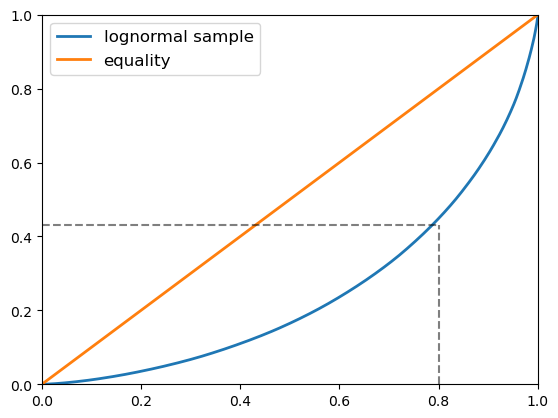

In [3]:
n = 2000
sample = np.exp(np.random.randn(n))

fig, ax = plt.subplots()

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'lognormal sample', lw=2)
ax.plot(f_vals, f_vals, label='equality', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.43], alpha=0.5, colors='k', ls='--')
ax.hlines([0.43], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

plt.show()

In [4]:
url = 'https://media.githubusercontent.com/media/QuantEcon/high_dim_data/main/SCF_plus/SCF_plus_mini.csv'
df = pd.read_csv(url)
df = df.dropna()
df_income_wealth = df

In [5]:
df_income_wealth.head()

,year,n_wealth,t_income,l_income,weights,nw_groups,ti_groups
0,1950,266933.75,55483.027,0.0,0.998732,50-90%,50-90%
1,1950,87434.46,55483.027,0.0,0.998732,50-90%,50-90%
2,1950,795034.94,55483.027,0.0,0.998732,Top 10%,50-90%
3,1950,94531.78,55483.027,0.0,0.998732,50-90%,50-90%
4,1950,166081.03,55483.027,0.0,0.998732,50-90%,50-90%


In [6]:
df = df_income_wealth 

varlist = ['n_wealth',    # net wealth 
           't_income',    # total income
           'l_income']    # labor income

years = df.year.unique()

# Create lists to store Lorenz data

F_vals, L_vals = [], []

for var in varlist:
    # create lists to store Lorenz, Ginis
    f_vals = []
    l_vals = []
    for year in years:

        # Repeat the observations according to their weights
        counts = list(round(df[df['year'] == year]['weights'] )) 
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        # Shuffle the sequence to improve the plot
        rd.shuffle(y)    
               
        # calculate and store Lorenz curve data
        f_val, l_val = qe.lorenz_curve(y)
        f_vals.append(f_val)
        l_vals.append(l_val)
        
    F_vals.append(f_vals)
    L_vals.append(l_vals)

f_vals_nw, f_vals_ti, f_vals_li = F_vals
l_vals_nw, l_vals_ti, l_vals_li = L_vals

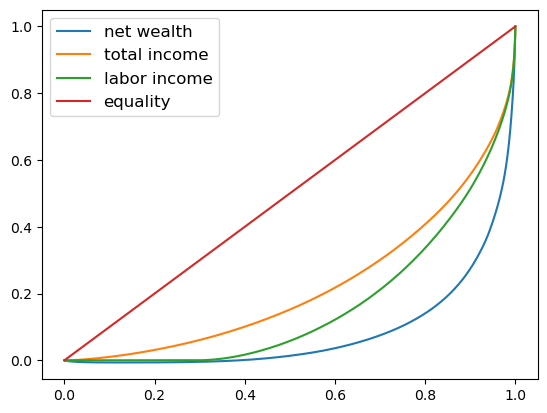

In [7]:
fig, ax = plt.subplots()

ax.plot(f_vals_nw[-1], l_vals_nw[-1], label=f'net wealth')
ax.plot(f_vals_ti[-1], l_vals_ti[-1], label=f'total income')
ax.plot(f_vals_li[-1], l_vals_li[-1], label=f'labor income')
ax.plot(f_vals_nw[-1], f_vals_nw[-1], label=f'equality')

ax.legend(fontsize=12)   
plt.show()

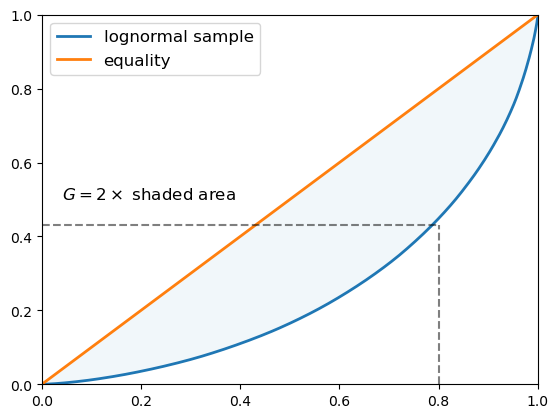

In [8]:
fig, ax = plt.subplots()

f_vals, l_vals = qe.lorenz_curve(sample)
ax.plot(f_vals, l_vals, label=f'lognormal sample', lw=2)
ax.plot(f_vals, f_vals, label='equality', lw=2)

ax.legend(fontsize=12)

ax.vlines([0.8], [0.0], [0.43], alpha=0.5, colors='k', ls='--')
ax.hlines([0.43], [0], [0.8], alpha=0.5, colors='k', ls='--')

ax.fill_between(f_vals, l_vals, f_vals, alpha=0.06)

ax.set_ylim((0, 1))
ax.set_xlim((0, 1))

ax.text(0.04, 0.5, r'$G = 2 \times$ shaded area', fontsize=12)
  
plt.show()

In [9]:
k = 5
σ_vals = np.linspace(0.2, 2.5, k)
n = 2_000

ginis = []

for σ in σ_vals:
    μ = -σ**2 / 2
    y = np.exp(μ + σ * np.random.randn(n))
    ginis.append(qe.gini_coefficient(y))

In [10]:
def plot_inequality_measures(x, y, legend, xlabel, ylabel):
    
    fig, ax = plt.subplots()
    ax.plot(x, y, marker='o', label=legend)

    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

    ax.legend(fontsize=12)
    plt.show()

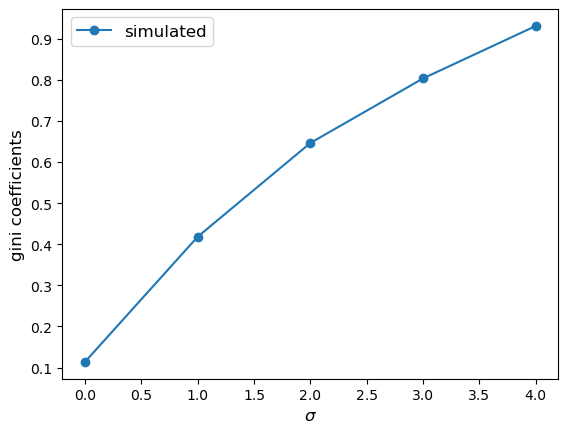

In [11]:
plot_inequality_measures(range(k), 
                         ginis, 
                         'simulated', 
                         '$\sigma$', 
                         'gini coefficients')

In [12]:
varlist = ['n_wealth',   # net wealth 
           't_income',    # total income
           'l_income']   # labor income

df = df_income_wealth  

# create lists to store Lorenz, Gini for each inequality measure

Ginis = []

for var in varlist:
    # create lists to store Lorenz, Ginis
    ginis = []
    
    for year in years:
        # repeat the observations according to their weights
        counts = list(round(df[df['year'] == year]['weights'] ))  
        y = df[df['year'] == year][var].repeat(counts)
        y = np.asarray(y)
        
        rd.shuffle(y)    # shuffle the sequence
        
        # calculate and store ginis
        gini = qe.gini_coefficient(y)
        ginis.append(gini)
        
    Ginis.append(ginis)

In [13]:
ginis_nw, ginis_ti, ginis_li = Ginis

In [14]:
# use an average to replace an outlier in labor income gini
ginis_li_new = ginis_li
ginis_li_new[5] = (ginis_li[4] + ginis_li[6]) / 2    

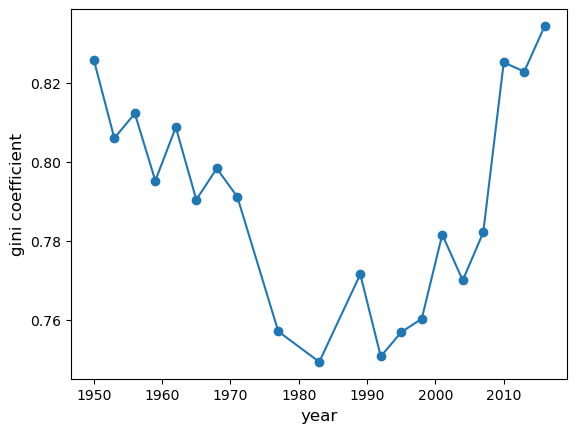

In [15]:
xlabel = "year"
ylabel = "gini coefficient"

fig, ax = plt.subplots()

ax.plot(years, ginis_nw, marker='o')

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)
    
plt.show()

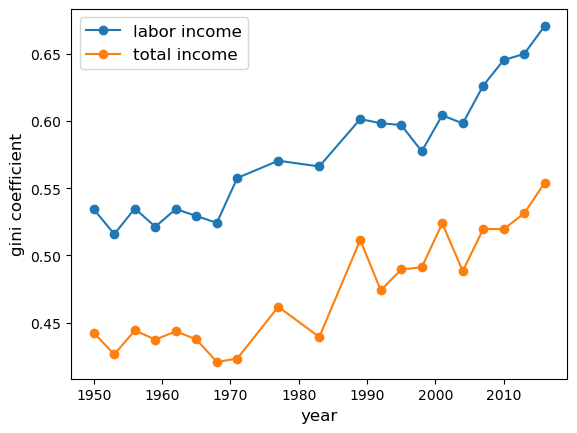

In [16]:
xlabel = "year"
ylabel = "gini coefficient"

fig, ax = plt.subplots()

ax.plot(years, ginis_li_new, marker='o', label="labor income")
ax.plot(years, ginis_ti, marker='o', label="total income")

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

ax.legend(fontsize=12)     
plt.show()

In [17]:
# transfer the survey weights from absolute into relative values
df1 = df_income_wealth
df2 = df1.groupby('year').sum(numeric_only=True).reset_index()       # group
df3 = df2[['year', 'weights']]                    
df3.columns = 'year', 'r_weights'                          
df4 = pd.merge(df3, df1, how="left", on=["year"])   
df4['r_weights'] = df4['weights'] / df4['r_weights']                 

# create weighted nw, ti, li

df4['weighted_n_wealth'] = df4['n_wealth'] * df4['r_weights']                   
df4['weighted_t_income'] = df4['t_income'] * df4['r_weights']                    
df4['weighted_l_income'] = df4['l_income'] * df4['r_weights']                   

# extract two top 10% groups by net wealth and total income.

df6 = df4[df4['nw_groups'] == 'Top 10%']
df7 = df4[df4['ti_groups'] == 'Top 10%']

# calculate the sum of weighted top 10% by net wealth, total income and labor income.

df5 = df4.groupby('year').sum(numeric_only=True).reset_index()  
df8 = df6.groupby('year').sum(numeric_only=True).reset_index()
df9 = df7.groupby('year').sum(numeric_only=True).reset_index()

df5['weighted_n_wealth_top10'] = df8['weighted_n_wealth']
df5['weighted_t_income_top10'] = df9['weighted_t_income']
df5['weighted_l_income_top10'] = df9['weighted_l_income']

# calculate the top 10% shares of the three variables.

df5['topshare_n_wealth'] = df5['weighted_n_wealth_top10'] / df5['weighted_n_wealth']
df5['topshare_t_income'] = df5['weighted_t_income_top10'] / df5['weighted_t_income']
df5['topshare_l_income'] = df5['weighted_l_income_top10'] / df5['weighted_l_income']

# we only need these vars for top 10 percent shares
df_topshares = df5[['year', 'topshare_n_wealth', 'topshare_t_income', 'topshare_l_income']]  

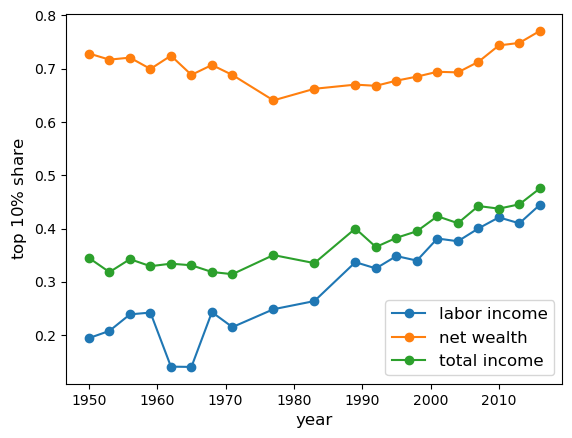

In [18]:
xlabel = "year"
ylabel = "top $10\%$ share"

fig, ax = plt.subplots()

ax.plot(years, df_topshares["topshare_l_income"], marker='o', label="labor income")
ax.plot(years, df_topshares["topshare_n_wealth"], marker='o', label="net wealth")
ax.plot(years, df_topshares["topshare_t_income"], marker='o', label="total income")

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

ax.legend(fontsize=12)
plt.show()

In [19]:
def calculate_top_share(s, p=0.1):
    
    s = np.sort(s)
    n = len(s)
    index = int(n * (1 - p))
    return s[index:].sum() / s.sum()

In [20]:
k = 5
σ_vals = np.linspace(0.2, 2.5, k)
n = 2_000

topshares = []

for σ in σ_vals:
    μ = -σ ** 2 / 2
    y = np.exp(μ + σ * np.random.randn(n))
    topshares.append(calculate_top_share(y))

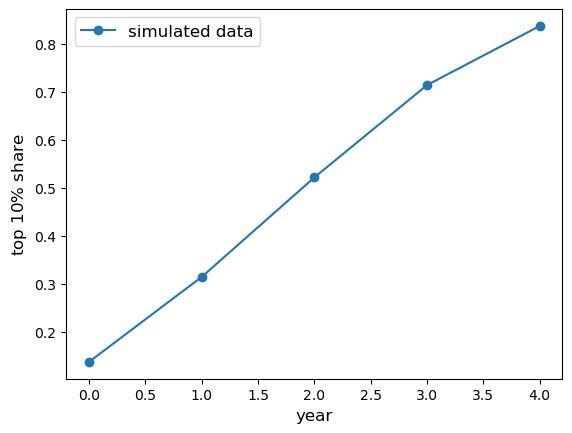

In [21]:
plot_inequality_measures(range(len(topshares)), 
                         topshares, 
                         "simulated data", 
                         "year", 
                         "top $10\%$ share") 

In [22]:
def lorenz2top(f_val, l_val, p=0.1):
    t = lambda x: interp(f_val, l_val, x)
    return 1- t(1 - p)

In [23]:
top_shares_nw = []
for f_val, l_val in zip(f_vals_nw, l_vals_nw):
    top_shares_nw.append(lorenz2top(f_val, l_val))

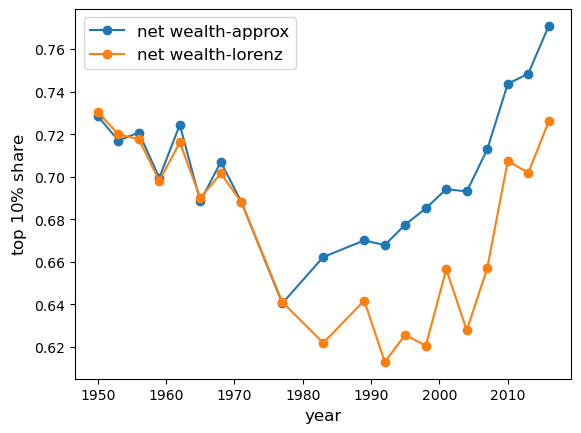

In [24]:
xlabel = "year"
ylabel = "top $10\%$ share"

fig, ax = plt.subplots()

ax.plot(years, df_topshares["topshare_n_wealth"], marker='o', label="net wealth-approx")
ax.plot(years, top_shares_nw, marker='o', label="net wealth-lorenz")

ax.set_xlabel(xlabel, fontsize=12)
ax.set_ylabel(ylabel, fontsize=12)

ax.legend(fontsize=12)
plt.show()